# Object Detection

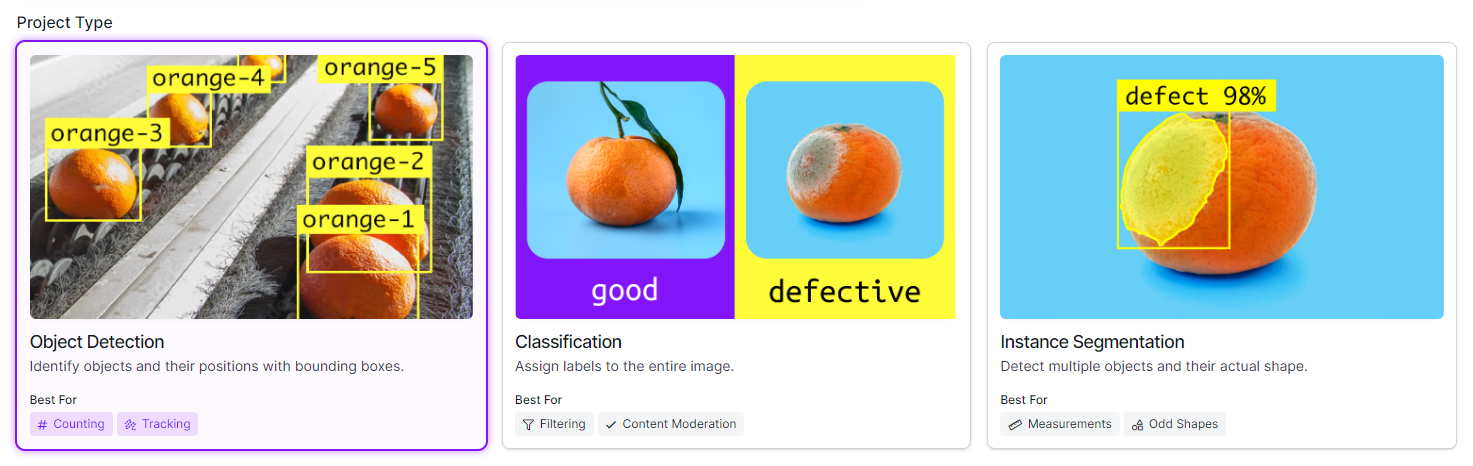

https://docs.ultralytics.com/models/yolov8/#overview

YOLOv8 는 실시간 물체 감지기 YOLO 시리즈의 최신 버전으로, 정확도와 속도 면에서 최첨단 성능을 제공합니다. 이전 버전( YOLO )의 발전된 기능을 기반으로 하는 YOLOv8 은 다양한 애플리케이션의 다양한 물체 감지 작업에 이상적인 선택이 될 수 있도록 새로운 기능과 최적화를 도입했습니다.

![](https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/yolo-comparison-plots.png)

https://cocodataset.org/#home

What is COCO?

COCO is a large-scale object detection, segmentation, and captioning dataset. COCO has several features:

- Object segmentation
- Recognition in context
- Superpixel stuff segmentation
- 330K images (>200K labeled)
- 1.5 million object instances
- 80 object categories
- 91 stuff categories
- 5 captions per image
- 250,000 people with keypoints

https://blog.roboflow.com/whats-new-in-yolov8/

## YOLOv8 Architecture: A Deep Dive

![](https://blog.roboflow.com/content/images/size/w1000/2023/01/image-16.png)

## KerasCV

In [ ]:
!pip install --upgrade git+https://github.com/keras-team/keras-cv -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.8 MB/s eta 0:00:00


### Package import

In [ ]:
!pip install --upgrade git+https://github.com/keras-team/keras-cv -q
!pip install -U keras-cv
!pip install -U keras-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.6 MB/s eta 0:00:00


In [ ]:
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import xml.etree.ElementTree as ET

import tensorflow as tf
from tensorflow import keras

import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization

Using TensorFlow backend


https://universe.roboflow.com/roboflow-100/soccer-players-5fuqs/dataset/2

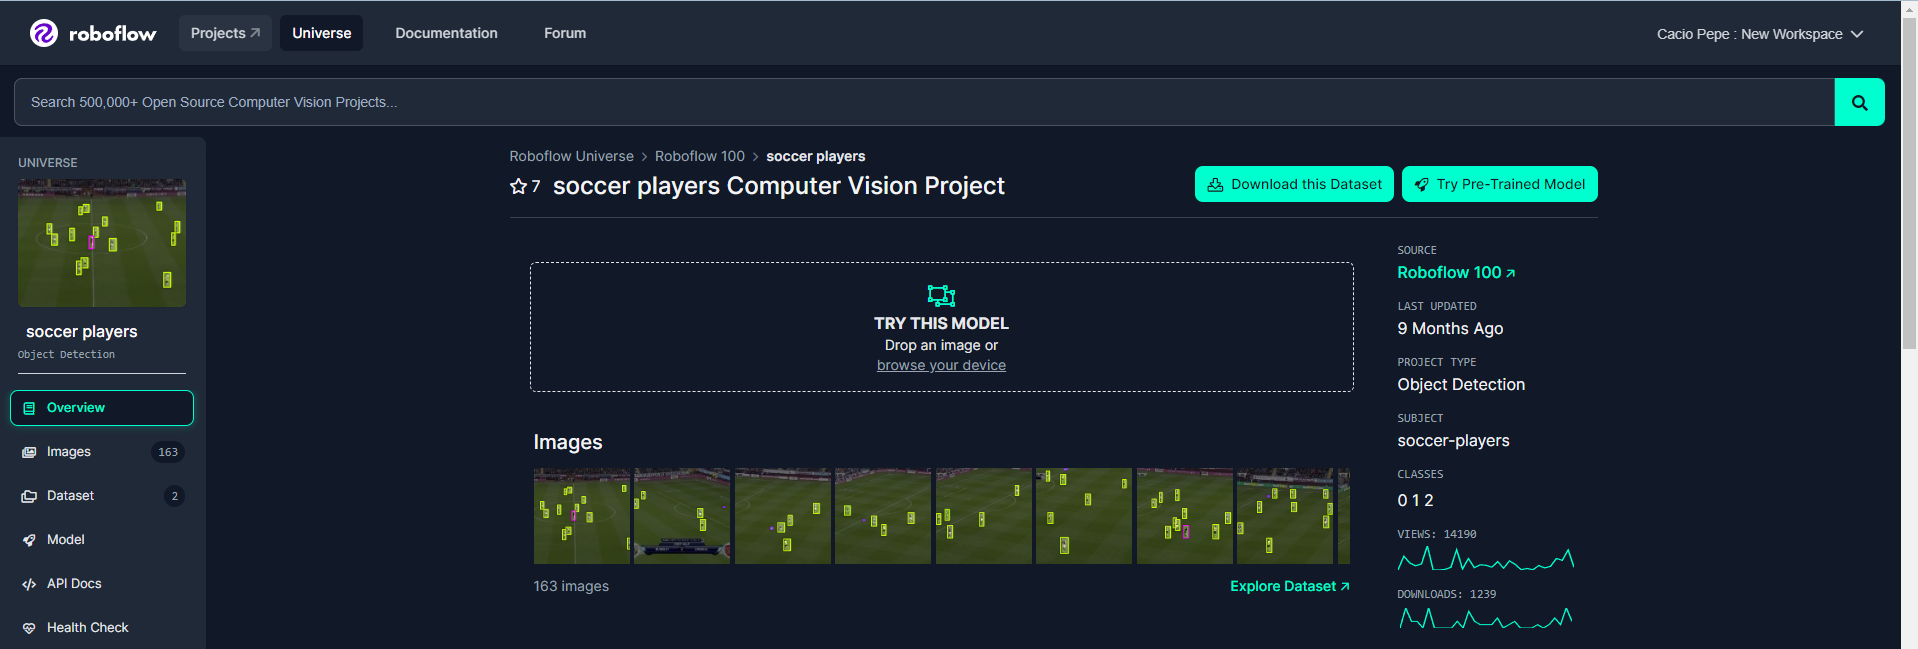

http://host.robots.ox.ac.uk/pascal/VOC/

In [ ]:
!curl -L "https://universe.roboflow.com/ds/HuLeKpHMEB?key=joJP8uvIBJ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0   2958      0 --:--:-- --:--:-- --:--:--  2953
100 6295k  100 6295k    0     0  6326k      0 --:--:-- --:--:-- --:--:-- 6326k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/1-fps-2_00001_jpeg_jpg.rf.7e6fb44050aa614a7003e79297cab088.jpg  
 extracting: test/1-fps-2_00001_jpeg_jpg.rf.7e6fb44050aa614a7003e79297cab088.xml  
 extracting: test/1-fps-2_00014_jpeg_jpg.rf.b2807ee897ff22ba353b845d34e8222b.jpg  
 extracting: test/1-fps-2_00014_jpeg_jpg.rf.b2807ee897ff22ba353b845d34e8222b.xml  
 extracting: test/1-fps-2_00022_jpeg_jpg.rf.19d5065bff5f9f4867f9f5296da767af.jpg  
 extracting: test/1-fps-2_00022_jpeg_jpg.rf.19d5065bff5f9f4867f9f5296da767af.xml  
 extracting: test/1-fps-2_00025_jpeg_jpg.rf.666ff9d0ffccf61080ce844f

In [ ]:
!curl -L "https://app.roboflow.com/ds/1Mx3YeBnCB?key=iOwE3TmpSX" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   900  100   900    0     0   3301      0 --:--:-- --:--:-- --:--:--  3308
100  112k  100  112k    0     0   229k      0 --:--:-- --:--:-- --:--:--  229k
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.roboflow.txt     
 extracting: train/1_jpg.rf.9f20b57e7139bbbf6ebdf9059361955a.jpg  
 extracting: train/1_jpg.rf.9f20b57e7139bbbf6ebdf9059361955a.xml  
 extracting: train/2_jpg.rf.6494e711b0dbcc6fafd6a8bb536fb457.jpg  
 extracting: train/2_jpg.rf.6494e711b0dbcc6fafd6a8bb536fb457.xml  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
video_path = '/content/drive/MyDrive/PREMIER LEAGUE HIGHLIGHTS 10sec.mp4의 사본'

Mounted at /content/drive


## Hyperparameters

In [ ]:
BATCH_SIZE = 4
LEARNING_RATE = 1e-03
EPOCH = 10
GLOBAL_CLIPNORM = 10.0

In [ ]:
class_ids = ['player', 'referee', 'football']

In [ ]:
class_mapping = dict(zip(range(len(class_ids)), class_ids))

In [ ]:
class_mapping

{0: 'player', 1: 'referee', 2: 'football'}

## Datastes

In [ ]:
# Path to images and annotations
train_path = "/content/train"
valid_path = "/content/valid"

In [ ]:
# # Get all XML file paths in path_annot and sort them
# train_xml_files = sorted(
#     [
#         os.path.join(train_path, file_name)
#         for file_name in os.listdir(train_path)
#         if file_name.endswith(".xml")
#     ]
# )

In [ ]:
from glob import glob

In [ ]:
train_xml_files = glob("/content/train/*.xml")

In [ ]:
train_xml_files = []
for file_name in os.listdir("/content/train"):
    if file_name.endswith(".xml"):
        train_xml_files.append(os.path.join(train_path, file_name))

In [ ]:
len(train_xml_files)

116

In [ ]:
train_xml_files[:10]

['/content/train/1-fps-2_00283_jpeg_jpg.rf.ce22610f7d7444304430aed5ab7c9a0a.xml',
 '/content/train/yt1s-com---Resume-Tottenham-20-West-Bromwich-Premier-League-J23_720p-fps-2_00015_jpeg_jpg.rf.dccc69ca13c804bb76edfd0af15c65c5.xml',
 '/content/train/1-fps-2_00037_jpeg_jpg.rf.5b3921909cda8aef108a5d5c3e2c4525.xml',
 '/content/train/1-fps-2_00354_jpeg_jpg.rf.817d7fb392362a8f6613a9b93d1157b2.xml',
 '/content/train/1-fps-2_00362_jpeg_jpg.rf.a670cb0cd7c95bf15836c8bd45f5add4.xml',
 '/content/train/yt1s-com---Resume-Tottenham-20-West-Bromwich-Premier-League-J23_720p-fps-2_00044_jpeg_jpg.rf.612e6c5e2606c41b141e54a91dbd5bd3.xml',
 '/content/train/1-fps-2_00033_jpeg_jpg.rf.d38a8a7cb5e15a9cd57099d35a4186f9.xml',
 '/content/train/1-fps-2_00124_jpeg_jpg.rf.17c7c9e20f0f291adfcf64dce845c23f.xml',
 '/content/train/yt1s-com---Resume-Liverpool-01-Burnley-Premier-League-J18-fps-2_00059_jpeg_jpg.rf.4c986b72234516832332646f8c00c6fd.xml',
 '/content/train/1-fps-2_00356_jpeg_jpg.rf.92ccbbbf92a15fbfc270971c17330

In [ ]:
valid_xml_files = sorted(
    [
        os.path.join(valid_path, file_name)
        for file_name in os.listdir(valid_path)
        if file_name.endswith(".xml")
    ]
)

In [ ]:
len(valid_xml_files)

33

In [ ]:
valid_xml_files[:10]

['/content/valid/1-fps-2_00007_jpeg_jpg.rf.9bfcc5ce836ecda13762429c67e27165.xml',
 '/content/valid/1-fps-2_00013_jpeg_jpg.rf.8cee98f596ad6abb76351ea5c672b4e8.xml',
 '/content/valid/1-fps-2_00015_jpeg_jpg.rf.09fae9ca269ab04e26b82cc3a5dd43ad.xml',
 '/content/valid/1-fps-2_00020_jpeg_jpg.rf.ea8c92d2758ed61d1deb3e9feca9e84e.xml',
 '/content/valid/1-fps-2_00023_jpeg_jpg.rf.f8d397c9fa18a7aff67dd893ba517566.xml',
 '/content/valid/1-fps-2_00024_jpeg_jpg.rf.c7b8c9d655474712fbfdd29443f0591e.xml',
 '/content/valid/1-fps-2_00046_jpeg_jpg.rf.93a5ea36534d2974a952e2eab211e3de.xml',
 '/content/valid/1-fps-2_00053_jpeg_jpg.rf.52036f286db800af219d9ac67b5f349b.xml',
 '/content/valid/1-fps-2_00175_jpeg_jpg.rf.64658b8c254525be80ae2c8fce5bc62a.xml',
 '/content/valid/1-fps-2_00177_jpeg_jpg.rf.ce765a85892e0eacab5fc0055034815c.xml']

In [ ]:
# Get all JPEG image file paths in path_images and sort them
train_jpg_files = sorted(
    [
        os.path.join(train_path, file_name)
        for file_name in os.listdir(train_path)
        if file_name.endswith(".jpg")
    ]
)

In [ ]:
len(train_jpg_files)

116

In [ ]:
train_jpg_files[:10]

['/content/train/1-fps-2_00002_jpeg_jpg.rf.f24b8f35a9a6b9ab091c9b94be838578.jpg',
 '/content/train/1-fps-2_00005_jpeg_jpg.rf.938964dd5e893b43d7bf42a362a3aefe.jpg',
 '/content/train/1-fps-2_00006_jpeg_jpg.rf.57931feb8afffae8db95c64a9279e8ab.jpg',
 '/content/train/1-fps-2_00008_jpeg_jpg.rf.0a1d994bc316aa81f374bf0f29410fb5.jpg',
 '/content/train/1-fps-2_00009_jpeg_jpg.rf.769d6c9b6050ced9d06fb2238413c2ff.jpg',
 '/content/train/1-fps-2_00010_jpeg_jpg.rf.429daa5382940cc0ee5c5d4490fde3e8.jpg',
 '/content/train/1-fps-2_00011_jpeg_jpg.rf.fda14f65fcbec9b7aa954978c5a89fad.jpg',
 '/content/train/1-fps-2_00012_jpeg_jpg.rf.c1640d15edf442970b0fb7926692034d.jpg',
 '/content/train/1-fps-2_00019_jpeg_jpg.rf.84d28ad6585c7bbff697a29b2c4710d1.jpg',
 '/content/train/1-fps-2_00021_jpeg_jpg.rf.443b02b71a2d6ff467050633dbee17ca.jpg']

In [ ]:
valid_jpg_files = sorted(
    [
        os.path.join(valid_path, file_name)
        for file_name in os.listdir(valid_path)
        if file_name.endswith(".jpg")
    ]
)

In [ ]:
len(valid_jpg_files)

33

In [ ]:
valid_jpg_files[:10]

['/content/valid/1-fps-2_00007_jpeg_jpg.rf.9bfcc5ce836ecda13762429c67e27165.jpg',
 '/content/valid/1-fps-2_00013_jpeg_jpg.rf.8cee98f596ad6abb76351ea5c672b4e8.jpg',
 '/content/valid/1-fps-2_00015_jpeg_jpg.rf.09fae9ca269ab04e26b82cc3a5dd43ad.jpg',
 '/content/valid/1-fps-2_00020_jpeg_jpg.rf.ea8c92d2758ed61d1deb3e9feca9e84e.jpg',
 '/content/valid/1-fps-2_00023_jpeg_jpg.rf.f8d397c9fa18a7aff67dd893ba517566.jpg',
 '/content/valid/1-fps-2_00024_jpeg_jpg.rf.c7b8c9d655474712fbfdd29443f0591e.jpg',
 '/content/valid/1-fps-2_00046_jpeg_jpg.rf.93a5ea36534d2974a952e2eab211e3de.jpg',
 '/content/valid/1-fps-2_00053_jpeg_jpg.rf.52036f286db800af219d9ac67b5f349b.jpg',
 '/content/valid/1-fps-2_00175_jpeg_jpg.rf.64658b8c254525be80ae2c8fce5bc62a.jpg',
 '/content/valid/1-fps-2_00177_jpeg_jpg.rf.ce765a85892e0eacab5fc0055034815c.jpg']

이미지 사이즈 확인

In [ ]:
images = []
for path in tqdm(valid_jpg_files):
    img = plt.imread(path)
    # print(img.shape)
    images.append(img)

  0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
for img in images:
    print(img.shape)

(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)


### parse

In [ ]:
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_name = root.find("filename").text
    image_path = os.path.join(os.path.dirname(xml_file), image_name)
    # image_path = xml_file.replace(".xml", ".jpg")

    boxes = []
    classes = []
    for obj in root.iter("object"):
        cls = obj.find("name").text
        classes.append(cls)

        bbox = obj.find("bndbox")
        xmin = float(bbox.find("xmin").text)
        ymin = float(bbox.find("ymin").text)
        xmax = float(bbox.find("xmax").text)
        ymax = float(bbox.find("ymax").text)
        boxes.append([xmin, ymin, xmax, ymax])

    class_ids = [
        list(class_mapping.keys())[list(class_mapping.values()).index(cls)]
        for cls in classes
    ]
    return image_path, boxes, class_ids


In [ ]:
train_image_paths = []
train_bbox = []
train_classes = []

for xml_file in tqdm(train_xml_files):

    image_path, boxes, class_ids = parse_annotation(xml_file)

    train_image_paths.append(image_path)
    train_bbox.append(boxes)
    train_classes.append(class_ids)

  0%|          | 0/116 [00:00<?, ?it/s]

In [ ]:
train_bbox[0]

[[599.0, 224.0, 625.0, 312.0],
 [337.0, 558.0, 366.0, 641.0],
 [112.0, 401.0, 141.0, 498.0],
 [181.0, 270.0, 209.0, 353.0],
 [78.0, 115.0, 99.0, 181.0],
 [175.0, 70.0, 192.0, 121.0],
 [282.0, 138.0, 305.0, 201.0],
 [318.0, 90.0, 337.0, 141.0],
 [294.0, 236.0, 315.0, 313.0],
 [342.0, 218.0, 364.0, 307.0],
 [1.0, 213.0, 14.0, 290.0],
 [35.0, 292.0, 59.0, 381.0],
 [334.0, 133.0, 347.0, 153.0]]

In [ ]:
train_classes[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2]

In [ ]:
train_image_paths[0]

'/content/train/1-fps-2_00283_jpeg_jpg.rf.ce22610f7d7444304430aed5ab7c9a0a.jpg'

In [ ]:
valid_image_paths = []
valid_bbox = []
valid_classes = []

for xml_file in tqdm(valid_xml_files):
    image_path, boxes, class_ids = parse_annotation(xml_file)
    valid_image_paths.append(image_path)
    valid_bbox.append(boxes)
    valid_classes.append(class_ids)

  0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
train_bbox = tf.ragged.constant(train_bbox)
train_classes = tf.ragged.constant(train_classes)
train_image_paths = tf.ragged.constant(train_image_paths)

In [ ]:
valid_bbox = tf.ragged.constant(valid_bbox)
valid_classes = tf.ragged.constant(valid_classes)
valid_image_paths = tf.ragged.constant(valid_image_paths)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((train_image_paths, train_classes, train_bbox))

In [ ]:
valid_data = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_classes, valid_bbox))

In [ ]:
def load_image(image_path):
    image = tf.io.read_file(image_path) # plt.imread
    image = tf.image.decode_jpeg(image, channels=3)
    return image

def load_dataset(image_path, classes, bbox):
    # Read Image
    image = load_image(image_path)
    bounding_boxes = {
        "classes": tf.cast(classes, dtype=tf.float32),
        "boxes": bbox,
    }
    return {"images": tf.cast(image, tf.float32), "bounding_boxes": bounding_boxes}

In [ ]:
augmenter = keras.Sequential(
    layers=[
        keras_cv.layers.RandomFlip(mode="horizontal", bounding_box_format="xyxy"),
        keras_cv.layers.RandomShear(x_factor=0.2, y_factor=0.2, bounding_box_format="xyxy"),
        keras_cv.layers.JitteredResize(
            target_size=(640, 640), scale_factor=(0.75, 1.3), bounding_box_format="xyxy"
        ),
    ]
)

In [ ]:
train_ds = train_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(buffer_size=BATCH_SIZE * 4)
train_ds = train_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
train_ds = train_ds.map(augmenter, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
resizing = keras_cv.layers.JitteredResize(
    target_size=(640, 640), scale_factor=(0.75, 1.3), bounding_box_format="xyxy",
)

In [ ]:
valid_ds = valid_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = valid_ds.shuffle(BATCH_SIZE * 4)
valid_ds = valid_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
valid_ds = valid_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
def dict_to_tuple(inputs):
    return inputs["images"], inputs["bounding_boxes"]

In [ ]:
train_ds = train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
valid_ds = valid_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset("yolo_v8_xs_backbone_coco")
yolo = keras_cv.models.YOLOV8Detector(
    num_classes=len(class_mapping),
    bounding_box_format="xyxy",
    backbone=backbone,
    fpn_depth=1,
)

100%|██████████| 645/645 [00:00<00:00, 454kB/s]
100%|██████████| 5.11M/5.11M [00:00<00:00, 9.93MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=LEARNING_RATE,
    global_clipnorm=GLOBAL_CLIPNORM,
)

In [ ]:
yolo.compile(
    optimizer=optimizer,
    classification_loss="binary_crossentropy",
    box_loss="ciou",
)

In [ ]:
history = yolo.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCH,
)

Epoch 1/10
29/29 [==============================] - 73s 588ms/step - loss: 110.3954 - box_loss: 3.3285 - class_loss: 107.0668 - val_loss: 284.7348 - val_box_loss: 4.7893 - val_class_loss: 279.9455
Epoch 2/10
29/29 [==============================] - 16s 535ms/step - loss: 41.6130 - box_loss: 2.2845 - class_loss: 39.3285 - val_loss: 65.7534 - val_box_loss: 3.6151 - val_class_loss: 62.1383
Epoch 3/10
29/29 [==============================] - 16s 525ms/step - loss: 24.4806 - box_loss: 2.0662 - class_loss: 22.4144 - val_loss: 27.9562 - val_box_loss: 2.4830 - val_class_loss: 25.4732
Epoch 4/10
29/29 [==============================] - 15s 517ms/step - loss: 13.9165 - box_loss: 2.0572 - class_loss: 11.8593 - val_loss: 15.5202 - val_box_loss: 2.3792 - val_class_loss: 13.1409
Epoch 5/10
29/29 [==============================] - 17s 537ms/step - loss: 7.9441 - box_loss: 1.9179 - class_loss: 6.0262 - val_loss: 17.8690 - val_box_loss: 2.3838 - val_class_loss: 15.4853
Epoch 6/10
29/29 [===============

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# 비디오에서 프레임을 추출하는 함수
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

In [ ]:
############################################################################


In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_encoded = b64encode(open(video_path, "rb").read()).decode()

video_html = HTML(f"""
<video width="640" height="480" controls>
  <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
</video>
""")

display(video_html)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PREMIER LEAGUE HIGHLIGHTS 10sec.mp4'

In [ ]:
!pip install -U ultralytics
!pip install --upgrade git+https://github.com/keras-team/keras-cv -q
!pip install -U keras-cv
!pip install -U keras-nlp
!pip install supervision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov9c.pt")

from google.colab import drive
drive.mount('/content/drive')
video_path = '/content/drive/MyDrive/온리스탯캠프/PREMIER LEAGUE HIGHLIGHTS 10sec.mp4의 사본'


cap = cv2.VideoCapture(video_path)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cnt = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cnt+=1
    else:
        break
print(cnt)
fps = cnt / 10
print(fps)

300
30.0


In [ ]:
while(cap.isOpened()):
    ret, frame = cap.read()
    break

array([[[ 51, 126,  92],
        [ 51, 126,  92],
        [ 51, 126,  92],
        ...,
        [ 76,  62, 101],
        [108,  94, 135],
        [107,  93, 134]],

       [[ 64, 139, 105],
        [ 64, 139, 105],
        [ 64, 139, 105],
        ...,
        [107,  93, 132],
        [144, 130, 171],
        [197, 183, 224]],

       [[ 72, 147, 113],
        [ 72, 147, 113],
        [ 72, 147, 113],
        ...,
        [117, 119, 135],
        [147, 145, 164],
        [203, 201, 220]],

       ...,

       [[ 29, 115,  81],
        [ 29, 115,  81],
        [ 29, 115,  81],
        ...,
        [ 23, 114,  79],
        [ 23, 115,  78],
        [ 23, 115,  78]],

       [[ 28, 114,  80],
        [ 28, 114,  80],
        [ 28, 114,  80],
        ...,
        [ 23, 114,  79],
        [ 23, 115,  78],
        [ 23, 115,  78]],

       [[ 28, 114,  80],
        [ 28, 114,  80],
        [ 28, 114,  80],
        ...,
        [ 23, 114,  79],
        [ 23, 115,  78],
        [ 23, 115,  78]]], dtype=uint8)
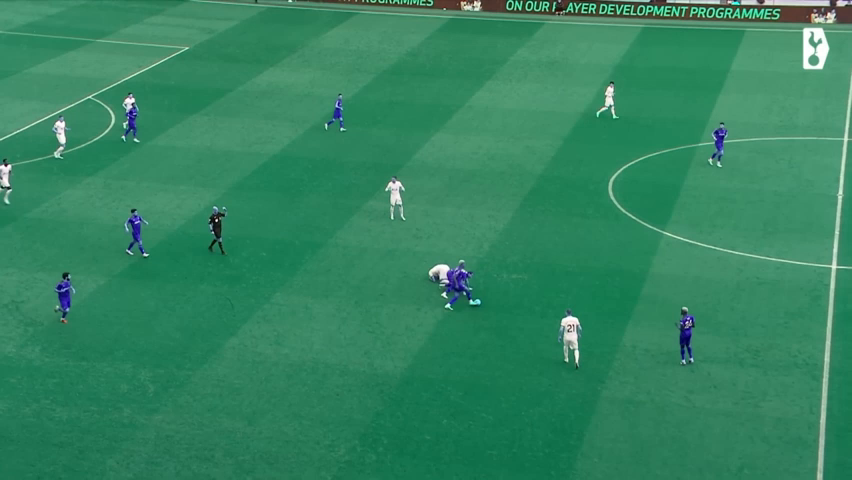

In [ ]:
frame

In [ ]:
type(frame)

numpy.ndarray

In [ ]:
frame.shape

(480, 852, 3)


0: 384x640 15 persons, 360.9ms
Speed: 4.3ms preprocess, 360.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


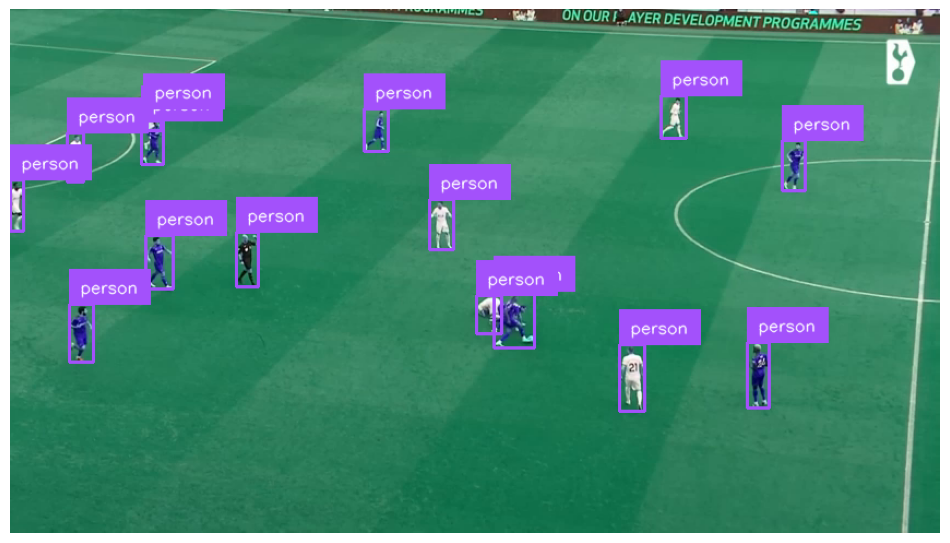

In [ ]:
image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    model.model.names[class_id]
    for class_id
    in detections.class_id
        ]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)
sv.plot_image(annotated_image)

In [ ]:
images = []
cap = cv2.VideoCapture(video_path)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        images.append(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    else:
        break

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output_video.mp4', fourcc, 30, (852,480))

for image in images:
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    labels = [
        model.model.names[class_id]
        for class_id
        in detections.class_id
            ]

        # labels = []
        # for class_id in detections.class_id:
        #     labels.append(model.model.names[class_id])

    annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)
    out.write(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

out.release()


0: 384x640 15 persons, 31.7ms
Speed: 3.0ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 31.7ms
Speed: 2.4ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 31.7ms
Speed: 2.4ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 2 sports balls, 33.1ms
Speed: 2.6ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 21.4ms
Speed: 3.9ms preprocess, 21.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 21.3ms
Speed: 3.4ms preprocess, 21.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 20.7ms
Speed: 3.4ms

In [ ]:
curl -L "https://universe.roboflow.com/ds/AB0CBrfw3u?key=jYDnQZbQAx" &gt; roboflow.zip; unzip roboflow.zip; rm roboflow.zip